In [1]:
from fastai.vision.all import *

In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *

In [3]:
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [4]:
searches = 'pothos', 'strawberry', 'aloe'
path = Path('images')

if not path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents=True)
        download_images(dest, urls=search_images(f'{o} plant photo'))
        resize_images(path/o, max_size=400, dest=path/o)

In [20]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

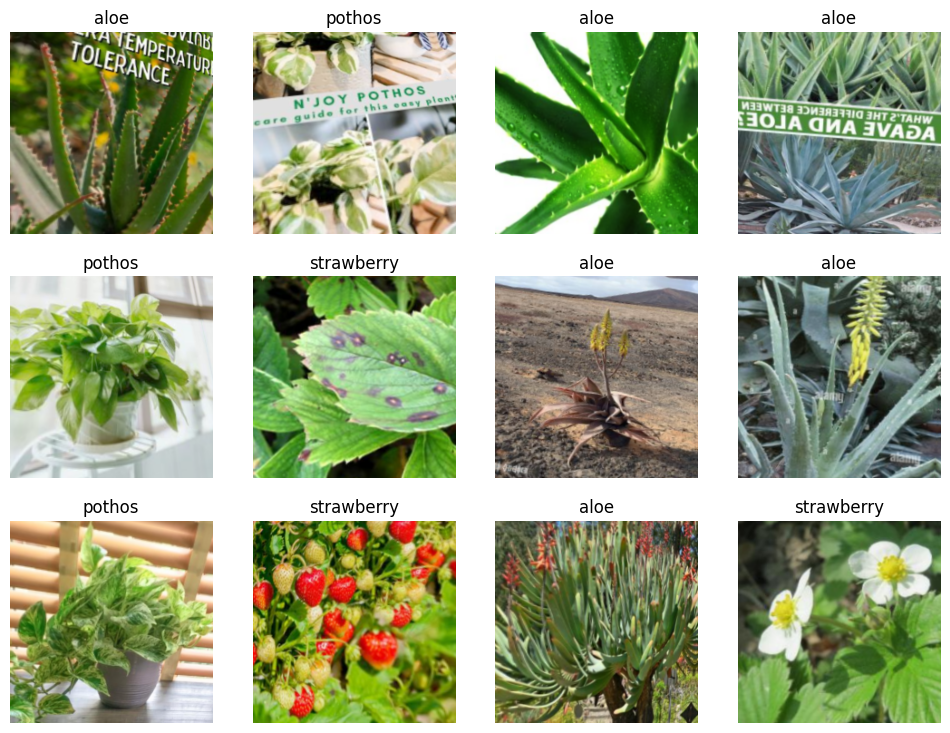

In [30]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[RandomResizedCrop(224, min_scale=0.5)],
    batch_tfms=aug_transforms()
)
dls = db.dataloaders(path)
dls.train.show_batch(max_n=12, nrows=3)

In [31]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [33]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.004199,0.036625,0.010000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.006820,0.046213,0.020000,00:01
1,0.006939,0.050281,0.020000,00:01
2,0.004916,0.027884,0.010000,00:01
3,0.006972,0.025665,0.010000,00:01
4,0.007085,0.051441,0.030000,00:01
5,0.006208,0.054110,0.030000,00:01
6,0.005780,0.049148,0.040000,00:01
7,0.007138,0.033078,0.020000,00:01
8,0.006073,0.024890,0.010000,00:01
9,0.006839,0.024690,0.010000,00:01


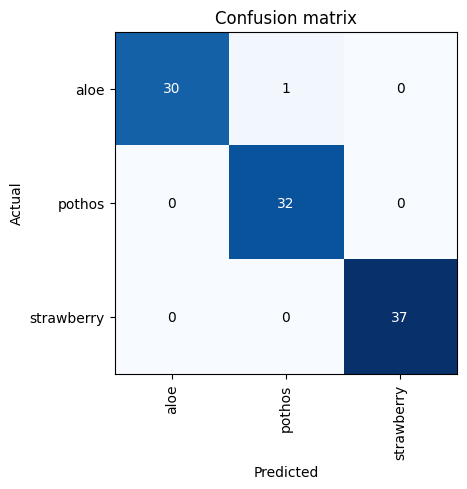

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

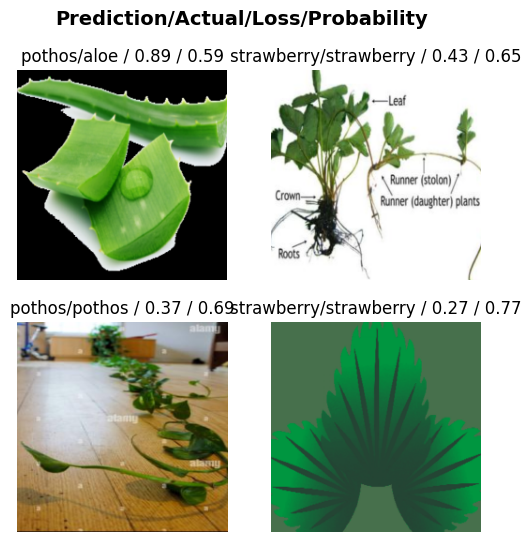

In [36]:
interp.plot_top_losses(4, nrows=2)

In [11]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner